In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
#Discretización
N=25
x = np.linspace(-4,4,N)
y = np.linspace(-4,4,N)
H = x[1]-x[0]
#h es el paso
#Generamos con el producto cruz de X y Y el set de --
#-- puntos (x,y) de la región A = [-4,4]x[-4,4], con 25 --
#--puntos en cada eje

In [11]:
#Definimos lo valores constantes para la función potencial
R = 2 #radio del cilindro (cm)
V = 2 #Velocidad (cm/s)
#Definimos la función potencial

def Potencial(x,y):
    res = (1-((R**2)/((x**2)+(y**2))))
    return V*x*res

In [12]:
X,Y =np.meshgrid(x,y)
P = Potencial(X,Y)
h = 0.001

<ipython-input-11-76cfa4aa060b>:7: RuntimeWarning: divide by zero encountered in true_divide
  res = (1-((R**2)/((x**2)+(y**2))))
<ipython-input-11-76cfa4aa060b>:8: RuntimeWarning: invalid value encountered in multiply
  return V*x*res


In [13]:
def Dx(f,x,y,h):
    return (f(x+h,y)-f(x-h,y))/(2*h)
def Dy(f,x,y,h):
    return (f(x,y+h)-f(x,y-h))/(2*h)

In [14]:
Ex = np.zeros((N,N))
Ey = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if ((x[i])**2+(y[j])**2) < R**2:
            Ex[i,j] = 0
            Ey[i,j] = 0
        else:
            Ex[i,j] = Dx(Potencial,x[i],y[j],h)
            Ey[i,j] = -Dy(Potencial,x[i],y[j],h)

    
Ex = Ex.T
Ey = Ey.T

/Users/juanpablo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/quiver.py:686: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/juanpablo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/quiver.py:686: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


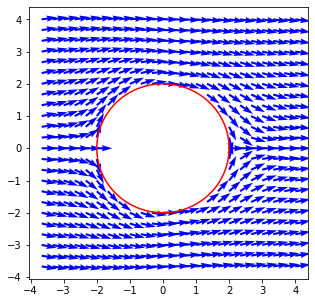

In [15]:
fig1 = plt.figure(figsize=(5,5))
ax = fig1.add_subplot(1,1,1)

for i in range(1,len(x)):
    for j in range(1,len(y)):
        ax.quiver(x[i],y[j],Ex[i,j],Ey[i,j],color='b')


m = np.zeros((100,100))
theta = np.linspace(0,2*np.pi,100)
m[0,:]= 2*np.cos(theta)
m[1,:]= 2*np.sin(theta)
plt.plot(m[0,:],m[1,:],color='r')